## Upcoming simulation strategy optimizations ##

The list of phase 2 survey strategy variations include 

### <a href='#baseline'>Baseline</a> ###
The updated baseline footprint is explored in more depth in the <a href="../SkyCoverage.ipynb">SkyCoverage</a> notebook, but the basic footprint is illustrated here too.

### <a href="#retro">Retro (comparison):</a> ### 
* Classic ‘traditional’ survey footprint and v2.0 settings - a halfway point between the classic footprint and the updated variations in the new simulations. Standard ‘traditional’ survey footprint used in baselines from v1.5 to 1.7.1, 2x15s visits in grizy and 1x30s in u band, 2-band rolling cadence in WFD
* Classic ‘traditional’ v1.5-v1.7.1 survey footprint and v1.7.1 settings. This run would be directly comparable to baseline_nexp2_v1.7.1_10yrs, but run with the newest version of the simulator. Standard ‘traditional’ survey footprint used in baselines from v1.5 to 1.7.1, 2x15s visits in all bands, no rolling cadence.

### Rolling Cadence: ###
* No rolling cadence anywhere (in comparison to the 2-band rolling cadence in the baseline). 
* 2-band rolling cadence at 50% strength
* 2-band rolling cadence at 90% strength 
* 3-band rolling cadence at 50% strength
* 3-band rolling cadence at 90% strength
* 6-band rolling cadence at 50% strength
* 6-band rolling cadence at 90% strength
* A stretch goal of 2-band rolling cadence in the low-dust extinction area, and 6-band rolling in the bulge area
Note that in each of these rolling cadence simulations ‘2-band’ is referring to the fraction of the sky which is ‘active’ in rolling at any time. 2-band means ½ of the sky is rolling; 3-band means ⅓ of the sky is rolling. In each of these cases, the active sky area is further split into a North and South region, to better manage alert follow-up. 

### <a href='#longer u'>Longer u-band visits:</a> ###
* Longer u-band visit time, and approximately the same number of visits in u as in the baseline. This requires more survey time to be spent on u band, so a few % of time is removed from other bandpasses (altering the filter balance slightly). 
* Longer u-band visit time, but the same relative amount of survey time. This reduces the number of visits in u band accordingly.

### <a href='#more u'>More blue band visits:</a> ###
* Increase the fraction of visits in g from 9% to 12%, while keeping u at ~ 7%.
* Increase the fraction of visits in g from 9% to 11% and increase u to ~ 8%.


### <a href='#nes'>NES visits:</a>  ###
Scale the NES visits up and down. The values listed below are *estimates* of what we might simulate.
* Approximately 200 visits per pointing in the NES
* Approximately 300 visits per pointing in the NES
* Approximately 500 visits per pointing in the NES

### <a href='#galactic plane'>GP visits:</a>  ###
Scale the background (non-bulge) galactic plane visits up and down. The values listed below are *estimates* of what we might simulate.
* Approximately 180 visits per pointing in the non-bulge GP
* Approximately 350 visits per pointing in the non-bulge GP

### Deep Drilling fraction: ###
* 3% time for DDF
* 8% time for DDF
* 2 of the DDFs will be chosen to roll on/off on alternating years 
* DDF visits acquired with AGN cadence 
* DDF visits acquired with DESC cadence 
* Stretch goal: DDFs where one field (COSMOS) is observed more heavily. COSMOS is at a different RA range than the other DDFs and may be more easily observable with a larger fraction of time 

### Presto Color: ###
* Triplets are obtained for all visits in only the first year, before rolling cadence starts in the low-dust-extinction WFD. This would enable variability template generation early in the survey. 
* Triplets are obtained for approximately 10% of the time in all years
* Triplets are obtained for approximately 20% of the time in all years
* Triplets are obtained for approximately 30% of the time in all years

### Long Gaps: ###
* Variable visit spacing between 2-14 hours after year 5 for 100% of visits
* Variable visit spacing between 2-14 hours after year 5 for 50% of visits
* Triplets are obtained approximately 10% of the time in all years, with intervals between 2-14 hours
* Triplets are obtained approximately 20% of the time in all years, with intervals between 2-14 hours

### Micro-surveys: ###
The micro-surveys represent a wide variety of quite different survey modes. Some of these have already been attempted in phase 1 or are very simple to implement:
* Short twilight visits for near-Sun objects incl. NEOs 
* Single short (5s) exposure survey of the sky in ugrizy in year 1 for static sky calibration
* Multiple short exposures of the sky in ugrizy at a range of times for transient detection and static sky calibration 
* ToO follow-up to identify optical counterparts of gravitational wave sources 
* Addition of a northern stripe with a limited number of visits in ugrizy from the upper limit of the survey footprint to Dec=+30

and some of these are less well defined or harder to implement and will be stretch goals:
* Mini-survey of Roman microlensing bulge field
* Micro-survey of the Virgo Cluster
* Deeper g-band imaging of 10 local volume galaxies
* High cadence visits of 2 fields in the SMC for microlensing
* All of the micro-surveys 


For some of these simulations, it is easy to set up and modify the Sky_area_generator to meet these goals, so these footprints are demonstrated here. 

In [1]:
import warnings
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
%matplotlib inline
import healpy as hp
import pandas as pd

from rubin_sim.scheduler.utils import Sky_area_generator
import rubin_sim.maf as maf

import survey_utils as su

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


<a id='baseline'></a>

## Baseline ## 

In [2]:
baseline = Sky_area_generator(nside=64)
baseline.set_maps(ddf=True)
baseline.combine_maps()
area, srd_area, subscription = su.calc_area_time(baseline.total/baseline.nvis['dustfree'], baseline.nvis['dustfree'])
print(f'Quick estimate of overall survey subscription {subscription}')
print(f'With about {srd_area} sq deg anticipated above SRD minimum nvisits')

Quick estimate of overall survey subscription 1.0028456912292532
With about 20076.001585735437 sq deg anticipated above SRD minimum nvisits


0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0


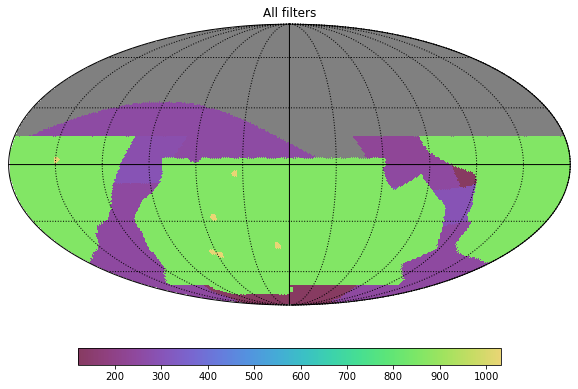

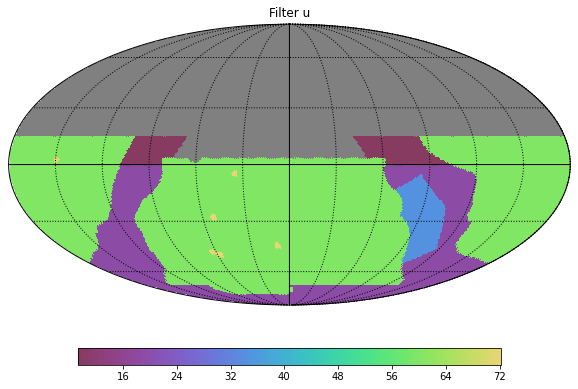

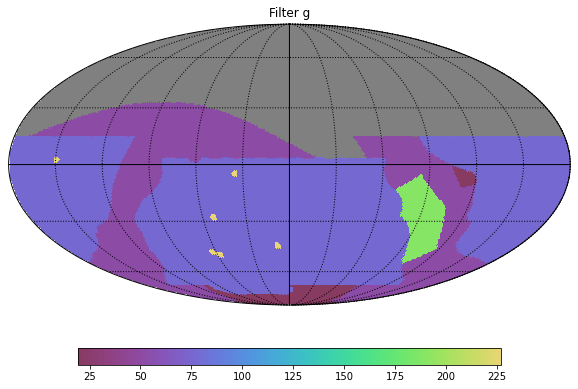

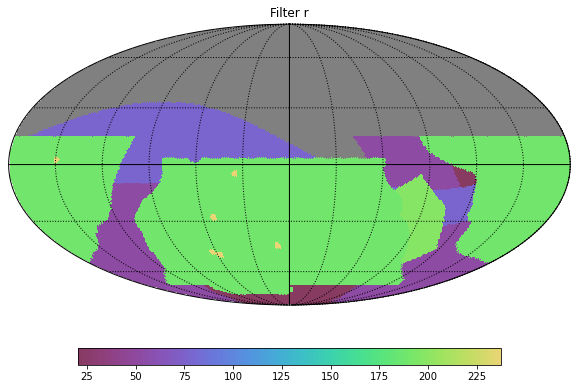

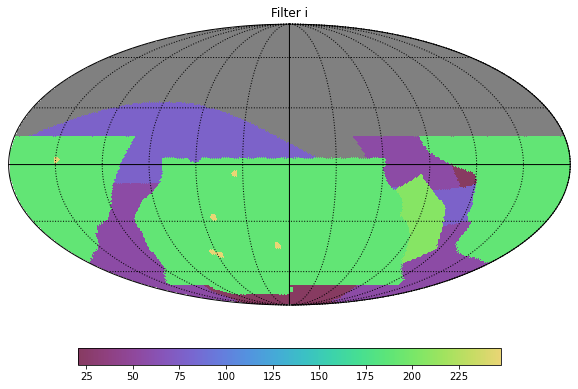

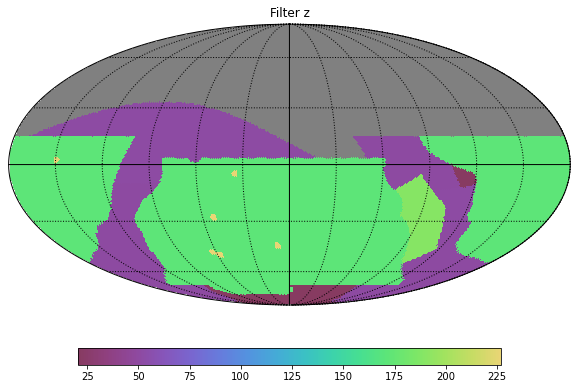

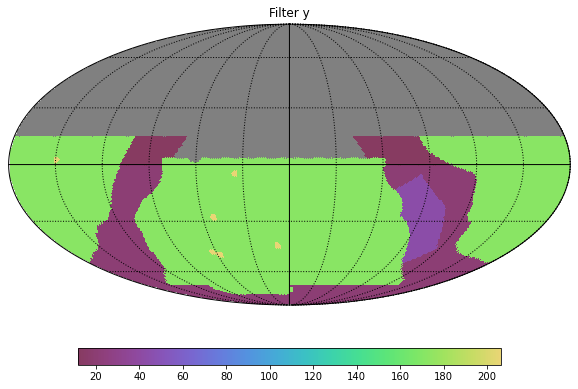

In [3]:
su.plot_footprints(baseline)

<a id='retro'></a>

## Retro ##

These simulations are intended to provide a bridge to older simulations (the old-style baseline), as well as allow testing of metrics or scheduler code in our new rubin\_sim package compared to the now-deprecated lsst.sims packages. 

The retro footprint can be generated using the previous standard_goals call, or by modifying the footprint with the new Sky_area_generator.

The retro footprint is more 'compact' than the updated baseline. While they both have similar amounts of area in WFD-like regions (there is about 2.5% more in the updated baseline), there is more area in regions with a few hundreds of visits in the updated baseline (about 5% more area in the updated baseline, weighting by number of visits). This is because the WFD-like area has been moved -- the new footprint places more WFD-like area in low-dust-extinction regions, while still adding new area in the galactic bulge and Magellanic Clouds. The low-dust extinction area increases by about 15% in the updated baseline. 

We expect the increase in overall survey area to be balanced by a decrease in visits per pointing. We do decrease the expected number of visits per pointing in the WFD-like areas by about 5%. To compensate for the decreased number of visits per pointing (in terms of metrics impacted by cadence), we have added a 2-band rolling cadence to the low-dust extinction WFD region.

(These numbers are demonstrated from the footprint in the table after cell 8 below) 

In terms of reproducing old simulations in detail, we will continue to use the old utilities (standard\_goals, etc). But if you just want to generate something that is close (within a few %) of the old footprint, using Sky\_area\_generator set up as below is reasonable.

0.0 180.0 -180.0 180.0


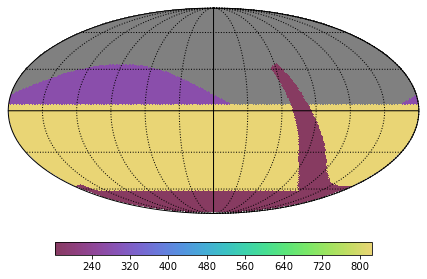

In [4]:
from rubin_sim.scheduler.utils import standard_goals
footprints_hp = standard_goals(nside=64)
standard_total = np.zeros(hp.nside2npix(64), float)
for f in footprints_hp:
    standard_total += footprints_hp[f]
    #plot_sky(footprints_hp[f])
su.plot_sky(standard_total/standard_total.max() * 825)

In [5]:
flat_filter_balance = {'u': 0.17, 'g': 0.165, 'r': 0.165, 'i': 0.165, 'z': 0.165, 'y': 0.158}
nes_filter_balance = {'u': 0, 'g': 0.2, 'r': 0.46, 'i': 0.46, 'z': 0.4, 'y': 0}
wfd_filter_balance = {'u': 0.29, 'g':0.43, 'r':1.0, 'i':1.0, 'z':0.88, 'y':0.88}

retro = Sky_area_generator()
retro.read_dustmap()
nvis_wfd = 900
retro.set_dustfree_wfd(nvis_wfd, dec_min=-62, dec_max=3.6, dust_limit=100000000, adjust_halves=0,
                       dustfree_wfd_filter_balance=wfd_filter_balance)
retro.set_nes(nvis_wfd * 0.337, eclat_min=-30, eclat_max=10, eclip_dec_min=3.6, dec_cutoff=3.6,
               nes_filter_balance=nes_filter_balance)
retro.set_galactic_plane(nvis_wfd*0.198, nvis_gal_min=0, dec_max=35,
                         center_width=10, end_width=4, gal_long1=290, gal_long2=70, gal_lat_width_max=0,
                         gal_filter_balance=flat_filter_balance)
retro.set_scp(nvis_wfd*0.198, dec_max=-62, scp_filter_balance=flat_filter_balance)
retro.set_magellanic_clouds(nvis_mcs=0)
retro.set_ddf()
gal_mask = np.where(retro.maps['gal'] > 0)[0]
retro.maps['dustfree'][gal_mask] = 0
for f in retro.filterlist:
    retro.maps_perfilter['dustfree'][f][gal_mask] = 0
retro.combine_maps(trim_overlap=False)


area, srd_area, subscription = su.calc_area_time(retro.total/retro.nvis['dustfree'], retro.nvis['dustfree'])
print(f'Quick estimate of overall survey subscription {subscription}')
print(f'With about {srd_area} anticipated above SRD minimum nvisits')

Quick estimate of overall survey subscription 1.002611097955977
With about 19371.73662511894 anticipated above SRD minimum nvisits


0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0


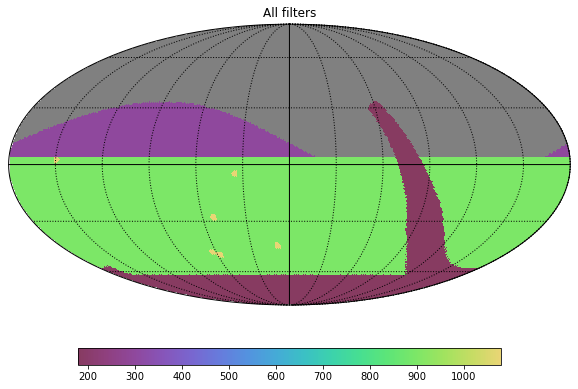

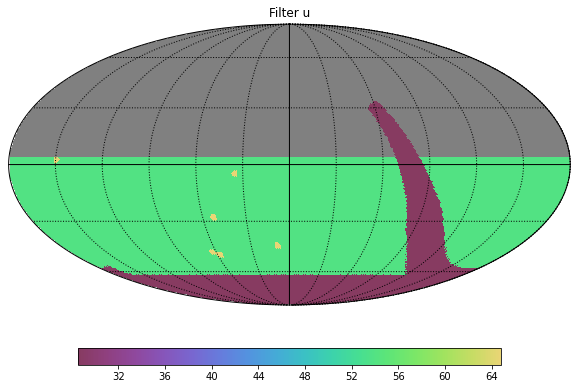

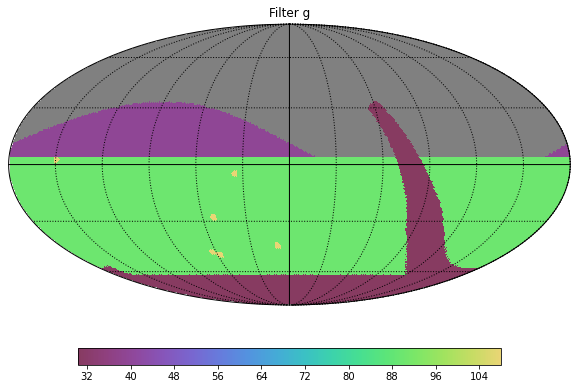

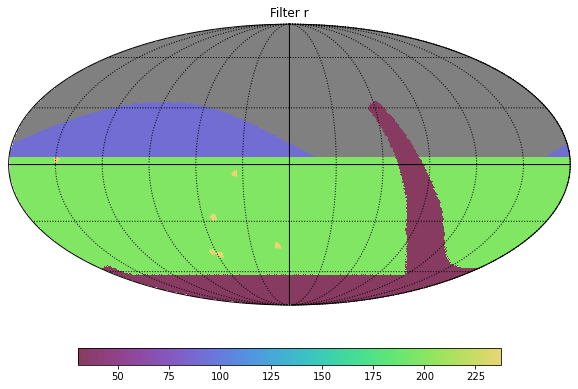

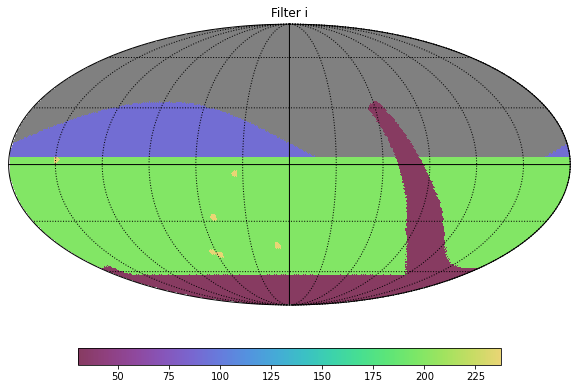

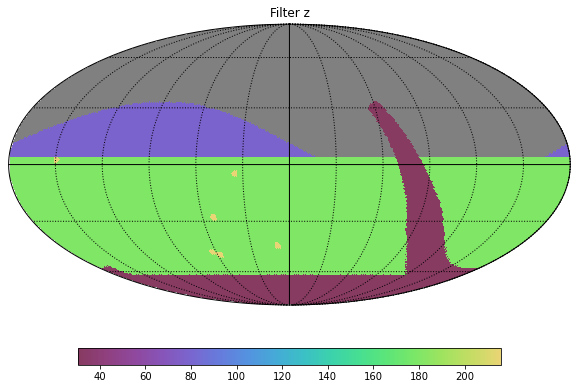

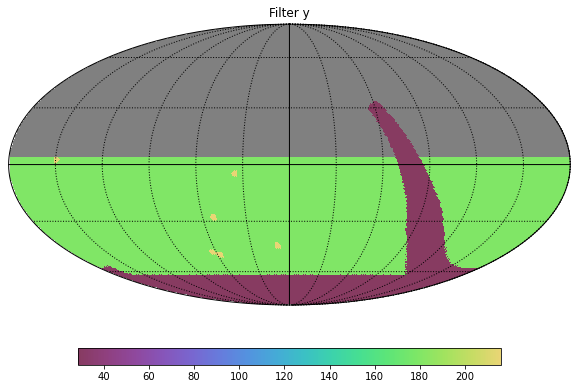

In [6]:
su.plot_footprints(retro)

In [7]:
# Comparisons between the baseline and the new retro footprint

# dust-free area
b_dustfree = len(np.where((baseline.dustfree == 1) & (baseline.total > 825))[0]) * hp.nside2pixarea(64, degrees=True)
r_dustfree = len(np.where((baseline.dustfree == 1) & (retro.total > 825))[0]) * hp.nside2pixarea(64, degrees=True)
b_area, b_srd_area, b_subscription = su.calc_area_time(baseline.total/baseline.nvis['dustfree'], baseline.nvis['dustfree'])
r_area, r_srd_area, r_subscription = su.calc_area_time(retro.total/retro.nvis['dustfree'], retro.nvis['dustfree'])

d =pd.DataFrame({'retro': [r_dustfree, r_srd_area, r_area, r_subscription, retro.nvis['dustfree']],
              'baseline': [b_dustfree, b_srd_area, b_area, b_subscription, baseline.nvis['dustfree']]},
            index=['Low-dust area', 'SRD area', 'Weighted area', 'Survey Fraction Required', 'N visits per pointing WFD'])
d['ratio'] = d['baseline'] / d['retro']
d

,retro,baseline,ratio
Low-dust area,14877.319155,17224.823481,1.157791
SRD area,19371.736625,20076.001586,1.036355
Weighted area,21484.523528,22489.064504,1.046756
Survey Fraction Required,1.002611,1.002846,1.000234
N visits per pointing WFD,900.000000,860.000000,0.955556


In [8]:
plot_comparison_standard_goals = False
if plot_comparison_standard_goals:
    with warnings.catch_warnings():
        warnings.simplefilter('ignore')
        hp.mollview(standard_total/np.median(standard_total) / (retro.total / np.median(retro.total)), 
                    title='Ratio total', min=0.9, max=1.1, cmap='RdBu')
        for f in footprints_hp:
            val1 = np.median(footprints_hp[f])
            val2 = np.median(retro.total_perfilter[f])
            print(f, val1/np.median(standard_total), val2/np.median(retro.total))
            hp.mollview(footprints_hp[f]/val1 / (retro.total_perfilter[f]/val2),
                        title=f'Ratio in filter {f}', min=0.9, max=1.1, cmap='RdBu')

<a id='nes'></a>

## NES variations ##

By removing or adding visits to the NES, we make more or less time available to the rest of the survey. Because of the way the scheduler works, the entire input map should be thought of as indicating a 'ratio' of visits across different regions - if there is more time available (say due to better weather), the entire map will have more visits across the whole map, and if there is less, the entire map will have fewer. If we only adjust the assigned number of visits to the NES, the additional time will be distributed across the rest of the survey. The amount of change can be estimated by looking at the 'overall survey subscription' below. 

0.0 180.0 -180.0 180.0


In the baseline, the NES has 258 visits,while the WFD regions have 860 (ratio 0.3)
In the variations, the NES has approximately [0.5  0.75 1.4 ] * baseline visits ([129. 193. 361.])

For the simulation with 0.5 of the baseline visits in the NES (129.0)
Quick estimate of overall survey subscription 0.9817699661847944
With about 20076.001585735437 anticipated above SRD minimum nvisits


0.0 180.0 -180.0 180.0



For the simulation with 0.75 of the baseline visits in the NES (193.0)
Quick estimate of overall survey subscription 0.9913387065307621
With about 20076.001585735437 anticipated above SRD minimum nvisits


0.0 180.0 -180.0 180.0



For the simulation with 1.4 of the baseline visits in the NES (361.0)
Quick estimate of overall survey subscription 1.0232004956095029
With about 20076.001585735437 anticipated above SRD minimum nvisits



,fraction baseline,Nvis NES,Overall survey time required
0,0.50,129.0,0.981770
1,0.75,193.0,0.991339
2,1.40,361.0,1.023200


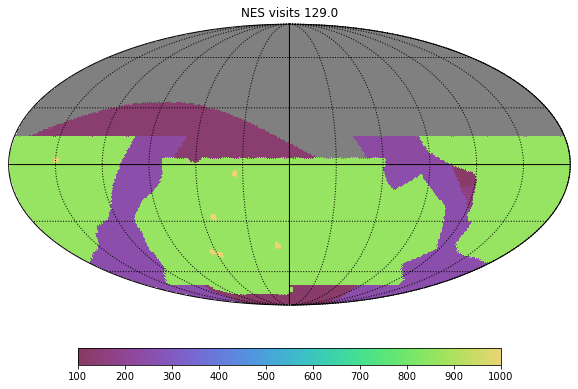

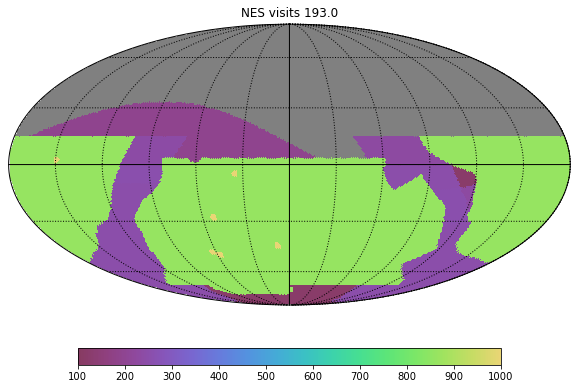

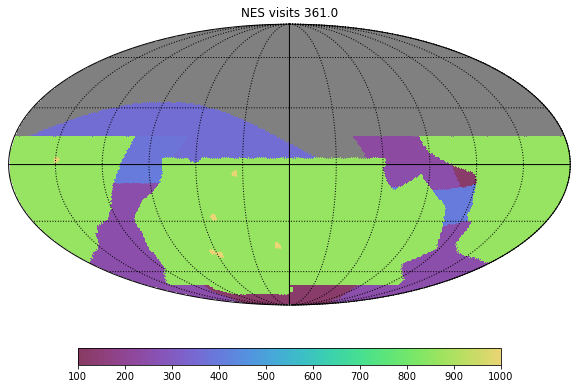

In [9]:
variations = np.array([0.5, 0.75, 1.4], float)
print(f"In the baseline, the NES has {baseline.nvis['nes']} visits,"
      f"while the WFD regions have {baseline.nvis['dustfree']} (ratio {baseline.nvis['nes']/baseline.nvis['dustfree']})")
print(f"In the variations, the NES has approximately {variations} * baseline visits "
      f"({np.floor(baseline.nvis['nes']*variations)})")
print()

survey = []
for frac, nvis_nes in zip(variations, np.floor(variations * baseline.nvis['nes'])):
    nes = Sky_area_generator()
    nes.set_maps(nes=False, ddf=True)
    nes.set_nes(nvis_nes=nvis_nes)
    nes.combine_maps()
    area, srd_area, subscription = su.calc_area_time(nes.total/nes.nvis['dustfree'], nes.nvis['dustfree'])
    survey.append(subscription)
    print(f"For the simulation with {frac} of the baseline visits in the NES ({nes.nvis['nes']})")
    print(f'Quick estimate of overall survey subscription {subscription}')
    print(f'With about {srd_area} anticipated above SRD minimum nvisits')
    su.plot_sky(nes.total, {'figsize': (8,6), 'colorMin': 100, 'colorMax': 1000, 
                         'title': f"NES visits {nes.nvis['nes']}"})
    print()

pd.DataFrame(zip(variations, np.floor(variations * baseline.nvis['nes']), survey),  
             columns=['fraction baseline', 'Nvis NES', 'Overall survey time required'])

<a id='galactic plane'></a>

## Galactic plane background (non-bulge) variations ##

This is slightly trickier because we don't want to vary the number of visits per pointing in the bulge, but rather the background galactic plane. Further, in the baseline, this is split into two regions -- there is the high-visit bulge, a larger diamond 'background bulge' region which has about 300 visits per pointing, and the remainder of the plane which has 250 visits per pointing.  This results in a ratio of about 850:300:250 (goal), or 1:.35:.29. 

For the variations, we keep the 0.83 ratio between the 'background bulge' and the 'rest of the galactic plane'.

Again,the variations in available time due to changing the number of visits in the background galactic plane are spread across the rest of the survey, if we only vary the galactic plane visits. The amount of change can be estimated by looking at the 'overall survey subscription' below - these variations are likely to impact the rest of the survey by about +/- 2%, approximately. 

0.0 180.0 -180.0 180.0


In the baseline, the background portion of the galactic plane has 232  visits while the WFD regions have 860 (ratio 0.27)
In the variations, the gal has approximately [0.5 1.4] * baseline visits ([116. 325.])

For the simulation with 0.5 of the baseline visits in the background galactic plane (116.0)
Quick estimate of overall survey subscription 0.9806487740715442
With about 20076.001585735437 anticipated above SRD minimum nvisits

For the simulation with 1.4 of the baseline visits in the background galactic plane (325.0)
Quick estimate of overall survey subscription 1.022814587148037
With about 20076.001585735437 anticipated above SRD minimum nvisits


0.0 180.0 -180.0 180.0


,fraction baseline,Nvis GP non-bulge,Overall survey time required
0,0.5,116.0,0.980649
1,1.4,325.0,1.022815


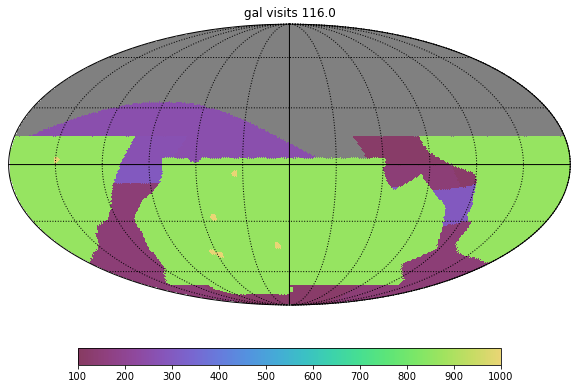

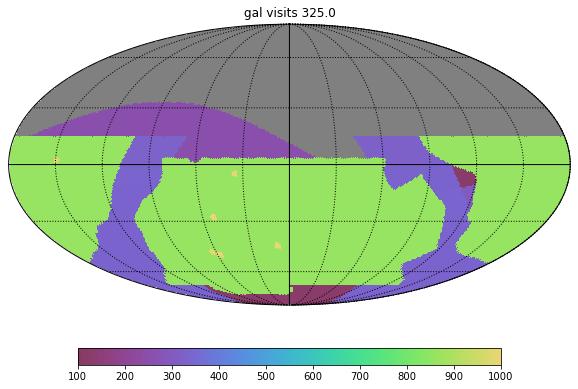

In [10]:
baseline_gal_B = baseline.nvis_wfd_default * baseline.nvis_frac_gp
variations = np.array([0.5, 1.4], float)
print(f"In the baseline, the background portion of the galactic plane "
      f"has {int(baseline_gal_B)}  visits",
      f"while the WFD regions have {baseline.nvis['dustfree']} (ratio {baseline_gal_B/baseline.nvis['dustfree']})")
print(f"In the variations, the gal has approximately {variations} * baseline visits "
      f"({np.floor(baseline_gal_B*variations)})")
print()

survey = []
for frac, nvis_gal in zip(variations, np.floor(variations * baseline_gal_B)):
    gal = Sky_area_generator()
    gal.set_maps(gp=False, ddf=True)
    gal.set_galactic_plane(nvis_gal_peak=baseline.nvis['gal'], 
                           nvis_gal_min=nvis_gal,)
    gal.combine_maps()
    area, srd_area, subscription = su.calc_area_time(gal.total/gal.nvis['dustfree'], gal.nvis['dustfree'])
    survey.append(subscription)
    print(f"For the simulation with {frac} of the baseline visits in the background galactic plane ({nvis_gal})")
    print(f'Quick estimate of overall survey subscription {subscription}')
    print(f'With about {srd_area} anticipated above SRD minimum nvisits')
    su.plot_sky(gal.total, {'figsize': (8,6), 'colorMin': 100, 'colorMax': 1000, 
                             'title': f"gal visits {nvis_gal}"})
    print()
    
pd.DataFrame(zip(variations, np.floor(variations * baseline_gal_B), survey),  
             columns=['fraction baseline', 'Nvis GP non-bulge', 'Overall survey time required'])

<a id='longer u'></a>

## Longer U-band visits ## 

While the footprint should look the same, the major difference in these simulations is just the filter balance. 
In one simulation, we aim to keep about the same number of visits in u-band, even with the longer exposure time -- this means keeping the filter balance the same. In the other, we aim to reduce the number of visits in u-band so that the amount of time is consistent; this requires modifying the filter balance. 

This must be done in each region of the sky.

In [11]:
standard_filter_balance = baseline.dustfree_wfd_filter_balance # low-dust-extinction WFD
standard_galactic_filter_balance = baseline.gal_filter_balance # galactic plane and MCs WFD
standard_scp_filter_balance = baseline.scp_filter_balance  # for the small region remaining in the SCP
# NES has no u-band, no change. 
standard_filter_balance, standard_galactic_filter_balance, standard_scp_filter_balance

({'u': 0.07, 'g': 0.09, 'r': 0.22, 'i': 0.22, 'z': 0.2, 'y': 0.2},
 {'u': 0.04, 'g': 0.22, 'r': 0.23, 'i': 0.24, 'z': 0.22, 'y': 0.05},
 {'u': 0.16, 'g': 0.16, 'r': 0.17, 'i': 0.17, 'z': 0.17, 'y': 0.17})

Increasing the u-band exposure time from 1x30s to 1x50s requires 66% more time. To keep the amount of time spent per filter the same, we must reduce the number of visits in u band accordingly.

In [12]:
# If we spend the time evenly in the other bandpasses:
u = {k: v for k, v in standard_filter_balance.items()}
u['u'] = u['u'] / 2
u = baseline._normalize_filter_balance(u)
u_dustfree = {k:v for k,v in u.items()}
d = pd.DataFrame([u, standard_filter_balance], index=['less u', 'baseline']).T
d['less u Nvis'] = d['less u'] * 850
d['baseline Nvis'] = d['baseline'] * 850
d['ratio'] = d['less u Nvis'] / d['baseline Nvis']
d

,less u,baseline,less u Nvis,baseline Nvis,ratio
u,0.04,0.07,34.0,59.5,0.571429
g,0.09,0.09,76.5,76.5,1.000000
r,0.22,0.22,187.0,187.0,1.000000
i,0.23,0.22,195.5,187.0,1.045455
z,0.21,0.20,178.5,170.0,1.050000
y,0.21,0.20,178.5,170.0,1.050000


In [13]:
# If we spend the time evenly in the other bandpasses:
u = {k: v for k, v in standard_galactic_filter_balance.items()}
u['u'] = u['u'] / 2
u = baseline._normalize_filter_balance(u)
u_gal = {k:v for k,v in u.items()}
d = pd.DataFrame([u, standard_galactic_filter_balance], index=['less u', 'baseline']).T
d['less u Nvis'] = d['less u'] * 850
d['baseline Nvis'] = d['baseline'] * 850
d['ratio'] = d['less u Nvis'] / d['baseline Nvis']
d

,less u,baseline,less u Nvis,baseline Nvis,ratio
u,0.02,0.04,17.0,34.0,0.5
g,0.22,0.22,187.0,187.0,1.0
r,0.23,0.23,195.5,195.5,1.0
i,0.24,0.24,204.0,204.0,1.0
z,0.22,0.22,187.0,187.0,1.0
y,0.05,0.05,42.5,42.5,1.0


In [14]:
# If we spend the time evenly in the other bandpasses:
u = {k: v for k, v in standard_scp_filter_balance.items()}
u['u'] = u['u'] / 2
u = baseline._normalize_filter_balance(u)
u_scp = {k:v for k,v in u.items()}
d = pd.DataFrame([u, standard_scp_filter_balance], index=['less u', 'baseline']).T
d['less u Nvis'] = d['less u'] * 120
d['baseline Nvis'] = d['baseline'] * 120
d['ratio'] = d['less u Nvis'] / d['baseline Nvis']
d

,less u,baseline,less u Nvis,baseline Nvis,ratio
u,0.09,0.16,10.8,19.2,0.562500
g,0.17,0.16,20.4,19.2,1.062500
r,0.18,0.17,21.6,20.4,1.058824
i,0.18,0.17,21.6,20.4,1.058824
z,0.18,0.17,21.6,20.4,1.058824
y,0.18,0.17,21.6,20.4,1.058824


In [15]:
uless = Sky_area_generator()
uless.set_maps(dustfree=False, gp=False, scp=False, ddf=True)
uless.set_dustfree_wfd(uless.nvis_wfd_default, dustfree_wfd_filter_balance=u_dustfree)
uless.set_galactic_plane(uless.nvis_wfd_default, gal_filter_balance=u_gal)
uless.set_scp(120, scp_filter_balance=u_scp)
uless.combine_maps()

area, srd_area, subscription = su.calc_area_time(uless.total/uless.nvis['dustfree'], uless.nvis['dustfree'])
print(f'Quick estimate of overall survey subscription {subscription}')
print(f'With about {srd_area} sq deg anticipated above SRD minimum nvisits')

Quick estimate of overall survey subscription 1.00401947509873
With about 20058.20856045696 sq deg anticipated above SRD minimum nvisits


0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0


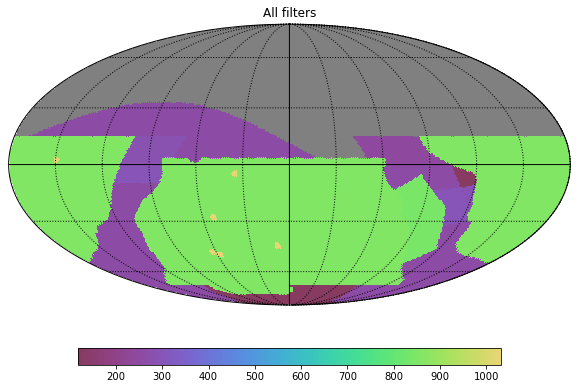

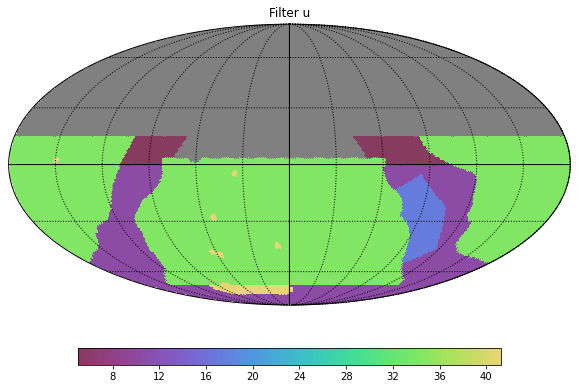

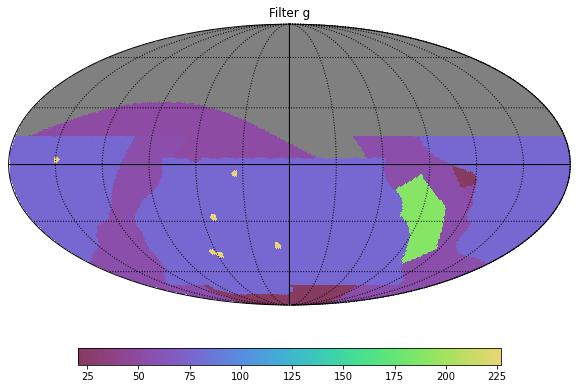

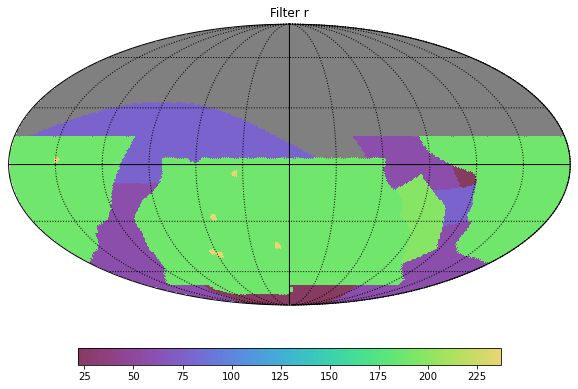

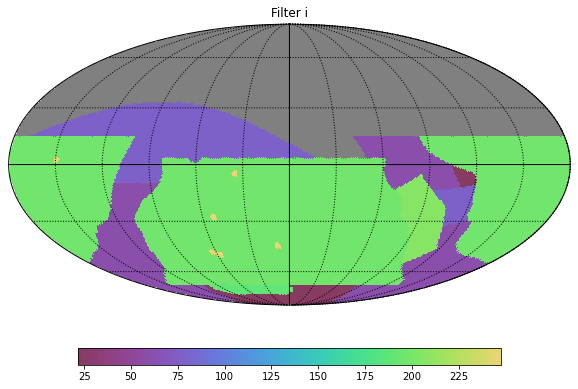

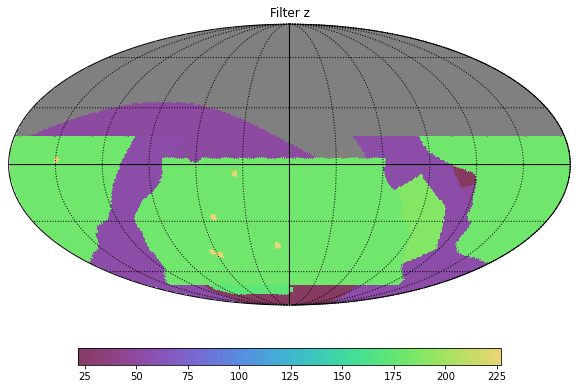

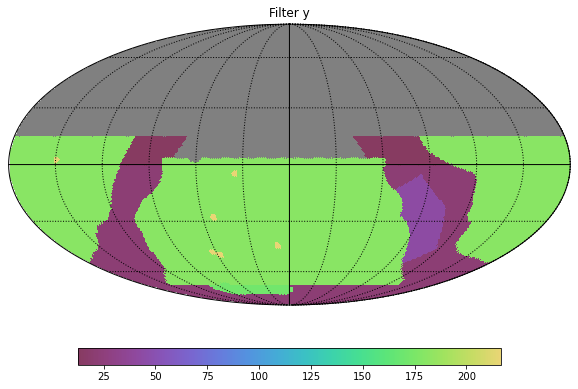

In [16]:
su.plot_footprints(uless)

<a id='more u'></a>

## More u-band visits ##

